# AdventureWorks sales analysis
This project analyzes the AdventureWorks database to answer business-related questions such as:

- Product categories and their sales

- Sales trends over time

- Regional sales performance

SQL is used to retrieve data, and Python is used for visualization and analysis.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

user = "SA"
password = quote_plus("!New!Pin!122")
server = 'localhost:1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\sasha\AppData\Local\Temp\ipykernel_10652\1680299386.py:24: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [2]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)

## Visualization 1: Number of products per category

How many products are there in each category?

Tables used:

- Production.ProductCategory

- Production.ProductSubcategory

- Production.Product  



Plan:

- JOIN the tables  

- Count distinct products per category

- Create a vertical bar chart

- Analyze the results

,CategoryName,ProductCount
0,Components,134
1,Bikes,97
2,Clothing,35
3,Accessories,29


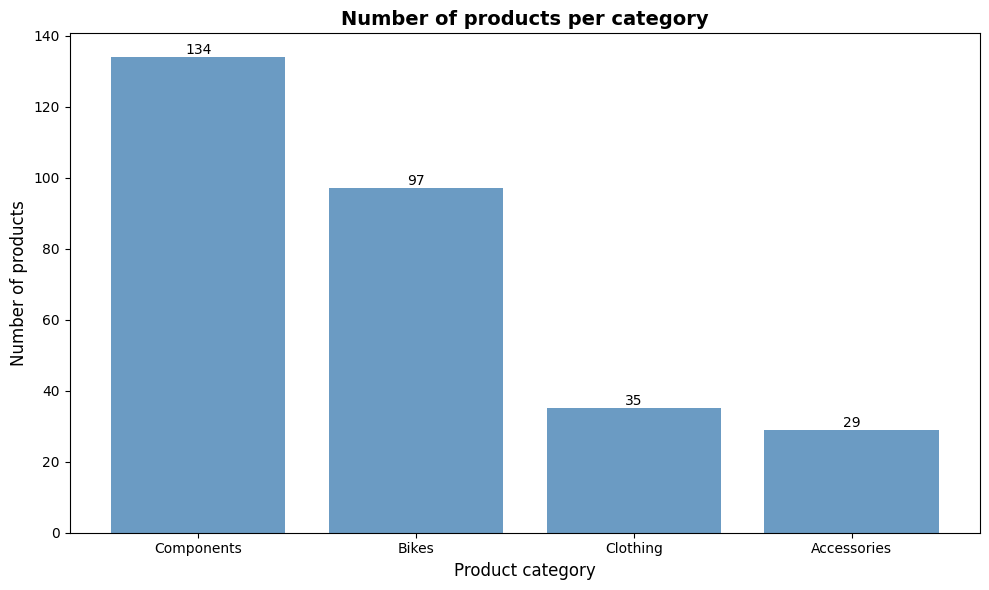

In [3]:
query_viz1 = """
SELECT
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
INNER JOIN Production.ProductSubcategory psc
    ON pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product p
    ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC
"""

df_viz1 = query_df(query_viz1)
display(df_viz1)

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(df_viz1['CategoryName'], df_viz1['ProductCount'], color='steelblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

ax.set_xlabel('Product category', fontsize=12)
ax.set_ylabel('Number of products', fontsize=12)
ax.set_title('Number of products per category', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### Insights – Number of products per category

Components is the largest category with 134 products, while Accessories is the smallest with 29 products.

This indicates that the company has a strong focus on components and spare parts, while accessories may represent a potential area for development.


## Visualization 2: Sales by product category

Which product categories generate the highest revenue?

Tables used:

- Production.ProductCategory

- Production.ProductSubcategory

- Production.Product

- Sales.SalesOrderDetail 



Plan:

- JOIN the tables

- Calculate total sales per category

- Sort categories by total sales (highest to lowest)

- Create a horizontal barh chart

- Analyze the results

,CategoryName,TotalSales
0,Bikes,9.465117e+07
1,Components,1.180259e+07
2,Clothing,2.120543e+06
3,Accessories,1.272073e+06


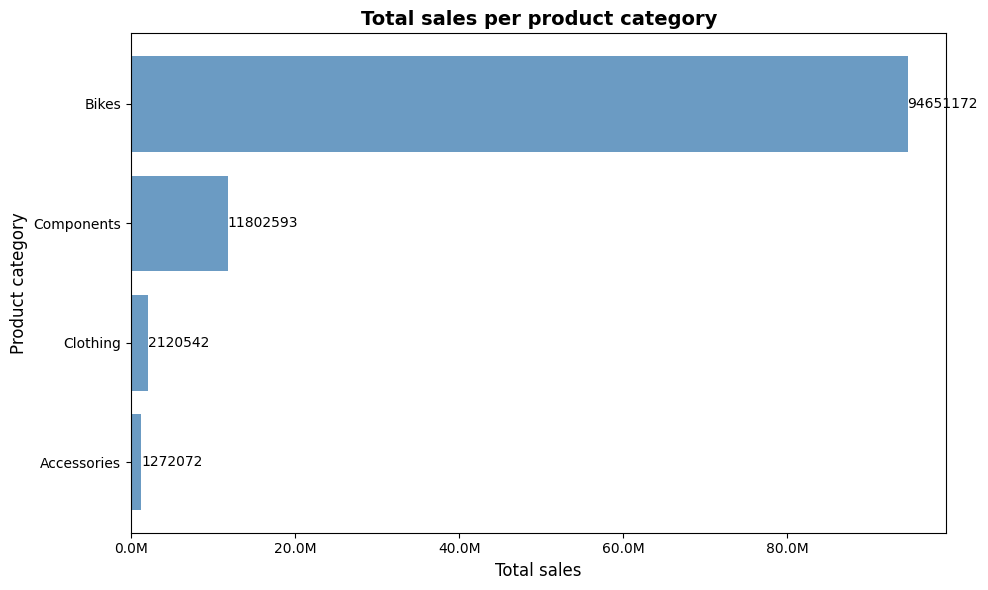

In [4]:
query_viz2 = """
SELECT
    ppc.Name AS CategoryName,
    SUM(sord.LineTotal) AS TotalSales
FROM Sales.SalesOrderDetail sord
INNER JOIN Production.Product pp
    ON sord.ProductID = pp.ProductID
INNER JOIN Production.ProductSubcategory pps
    ON pp.ProductSubcategoryID = pps.ProductSubcategoryID
INNER JOIN Production.ProductCategory ppc
    ON pps.ProductCategoryID = ppc.ProductCategoryID
GROUP BY ppc.Name
ORDER BY  TotalSales DESC
"""

df_viz2 = query_df(query_viz2)
display(df_viz2)



df_viz2 = df_viz2.sort_values (by="TotalSales")

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.barh(df_viz2['CategoryName'], df_viz2['TotalSales'], color='steelblue', alpha=0.8)

for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        va='center',
        ha='left'
    )

ax.set_xlabel('Total sales', fontsize=12)
ax.set_ylabel('Product category', fontsize=12)
ax.set_title('Total sales per product category', fontsize=14, fontweight='bold')
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

plt.tight_layout()
plt.show()

### Insights – Total sales per product category

Category "Bikes" has the highest total sales with approximately 94.7 million, while category "Accessories" has the lowest
sales with around 1.3 million. 

This shows that category "Bikes" is the main revenue-generating category for the company.

## Visualization 3: Sales trend over time

How have sales developed over time?

Tables used:

- Sales.SalesOrderHeader



Plan:

- Aggregate total sales per month

- Sort data chronologically

- Create a line chart (line plot)

- Analyze the results

,OrderDates,TotalSalesSum
0,2022-05,5.824153e+05
1,2022-06,2.244313e+06
2,2022-07,1.868508e+06
3,2022-08,1.483277e+06
4,2022-09,3.183714e+06
5,2022-10,2.543935e+06
6,2022-11,1.603314e+06
7,2022-12,2.807217e+06
8,2023-01,2.325569e+06
9,2023-02,1.620826e+06


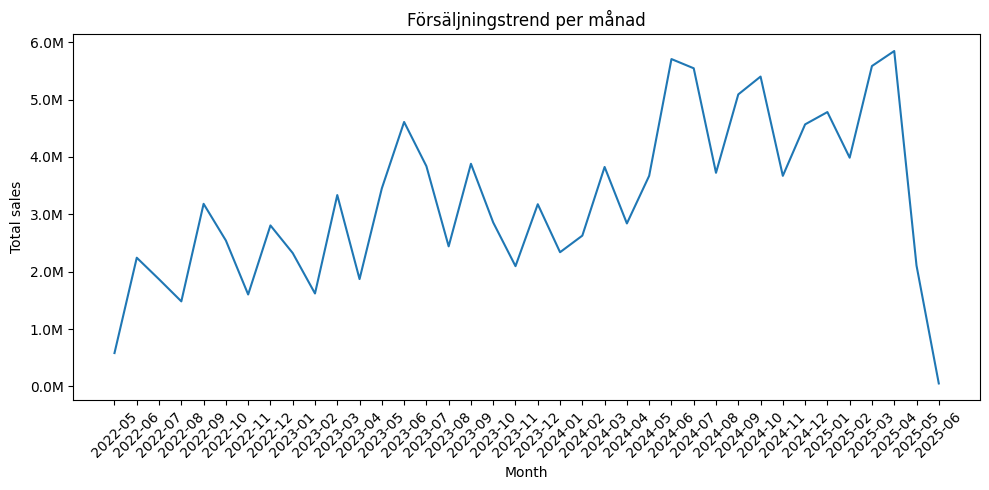

In [5]:
query_viz3 = """
SELECT
    FORMAT (OrderDate, 'yyyy-MM') AS OrderDates,
    SUM (TotalDue) AS TotalSalesSum
FROM Sales.SalesOrderHeader
GROUP BY FORMAT (OrderDate, 'yyyy-MM')
ORDER BY OrderDates
"""

df_viz3 = query_df(query_viz3)
display(df_viz3)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_viz3["OrderDates"], df_viz3["TotalSalesSum"])
ax.set_xlabel("Month")
ax.set_ylabel("Total sales")
ax.set_title("Försäljningstrend per månad")
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M')
)

plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Insights – Sales trend over time

The monthly sales trend shows a clear overall growth over time.  
Sales begin to increase from mid-2023 and reach their highest levels in March–April 2025.  
The highest monthly sales were recorded in April 2025 (5,847,164.69), while the lowest sales occurred in June 2022.  


Sales peaks are typically observed during the period from April to June, indicating a seasonal increase in sales during these months.

## Visualization 4: Sales and number of orders per year

What are the total sales and number of orders per year?

Tables used:

- Sales.SalesOrderHeader



Plan:

- Show both total sales and number of orders

- Sort data chronologically

- Create two separate bar charts per year

- Analyze the results

,OrderYear,TotalSalesYear,TotalOrderYear
0,2022,1.631669e+07,1692
1,2023,3.551471e+07,3830
2,2024,4.902049e+07,14244
3,2025,2.236490e+07,11699


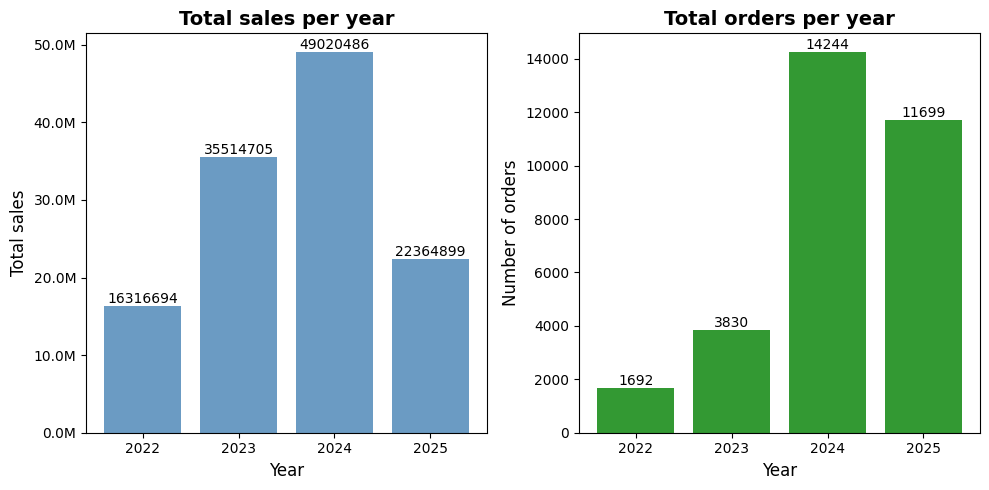

In [6]:
query_viz4 = """
SELECT
    YEAR(OrderDate) AS OrderYear,
    SUM(TotalDue) AS TotalSalesYear,
    COUNT(SalesOrderID) AS TotalOrderYear
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear
"""

df_viz4 = query_df(query_viz4)
display(df_viz4)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

bars1 = ax1.bar(df_viz4['OrderYear'].astype(str), df_viz4['TotalSalesYear'], color='steelblue', alpha=0.8)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total sales', fontsize=12)
ax1.set_title('Total sales per year', fontsize=14, fontweight='bold')
ax1.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M')
)

bars2 = ax2.bar(df_viz4['OrderYear'].astype(str), df_viz4['TotalOrderYear'], color='green', alpha=0.8)

for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of orders', fontsize=12)
ax2.set_title('Total orders per year', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Insights – Sales trend over time

2024 was the year with the highest total sales and also had a high number of orders.  

The next highest total sales were recorded in 2023; however, in terms of the number of orders per year, 2023 ranks third, after 2025, which had more orders than 2023 but lower total sales. 


Although 2024 had both the highest sales and a high order count, other years show that higher order volume does not necessarily lead to higher total sales. 

## Visualization 5: Top 10 products

Which 10 products generate the most sales?

Tables used:

- Production.Product

- Sales.SalesOrderDetail



Plan:

- Show TOP 10 products

- Sort data chronologically

- Create a Horizontal bar chart (barh)

- Analyze the results

,ProductID,ProductName,Total
0,782,"Mountain-200 Black, 38",4.400593e+06
1,783,"Mountain-200 Black, 42",4.009495e+06
2,779,"Mountain-200 Silver, 38",3.693678e+06
3,780,"Mountain-200 Silver, 42",3.438479e+06
4,781,"Mountain-200 Silver, 46",3.434257e+06
5,784,"Mountain-200 Black, 46",3.309673e+06
6,793,"Road-250 Black, 44",2.516857e+06
7,794,"Road-250 Black, 48",2.347656e+06
8,795,"Road-250 Black, 52",2.012448e+06
9,753,"Road-150 Red, 56",1.847819e+06


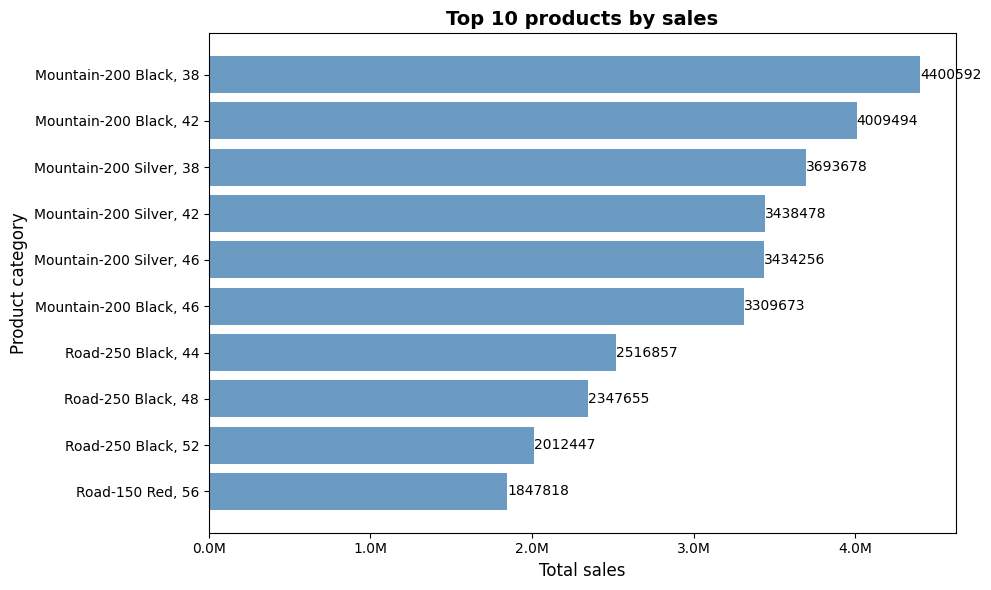

In [7]:
query_viz5 = """
SELECT
    TOP 10 pp.ProductID, pp.Name AS ProductName, SUM (sord.LineTotal) as Total
FROM Sales.SalesOrderDetail sord
INNER JOIN Production.Product pp
    ON sord.ProductID = pp.ProductID
GROUP BY pp.ProductID, pp.Name
ORDER BY Total DESC
"""

df_viz5 = query_df(query_viz5)
display(df_viz5)


df_viz5 = df_viz5.sort_values (by="Total")

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.barh(df_viz5['ProductName'], df_viz5['Total'], color='steelblue', alpha=0.8)

for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        va='center',
        ha='left'
    )

ax.set_xlabel('Total sales', fontsize=12)
ax.set_ylabel('Product category', fontsize=12)
ax.set_title('Top 10 products by sales', fontsize=14, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

plt.tight_layout()
plt.show()

### Insights – Top 10 products

The chart shows TOP 10 products that generate the highest total sales.  

"Mountain-200 Black, 38" dominating in TOP 10 with total 4400592.800400. 

## Visualization 6: Sales and number of customers per region

How do sales differ between different regions, and how many unique customers does each region have?

Tables used:

- Sales.SalesTerritory

- Sales.SalesOrderHeader

- Sales.Customer



Plan:

- Show total sales and number of unique customers by region

- Sort data chronologically

- Create grouped bar chart with two bars per region

- Analyze the results

,Region,TotalSale,CustomerID
0,Southwest,2.715059e+07,4565
1,Canada,1.839893e+07,1677
2,Northwest,1.806166e+07,3428
3,Australia,1.181438e+07,3625
4,Central,8.913299e+06,69
5,Southeast,8.884099e+06,91
6,United Kingdom,8.574049e+06,1951
7,France,8.119749e+06,1844
8,Northeast,7.820210e+06,57
9,Germany,5.479820e+06,1812


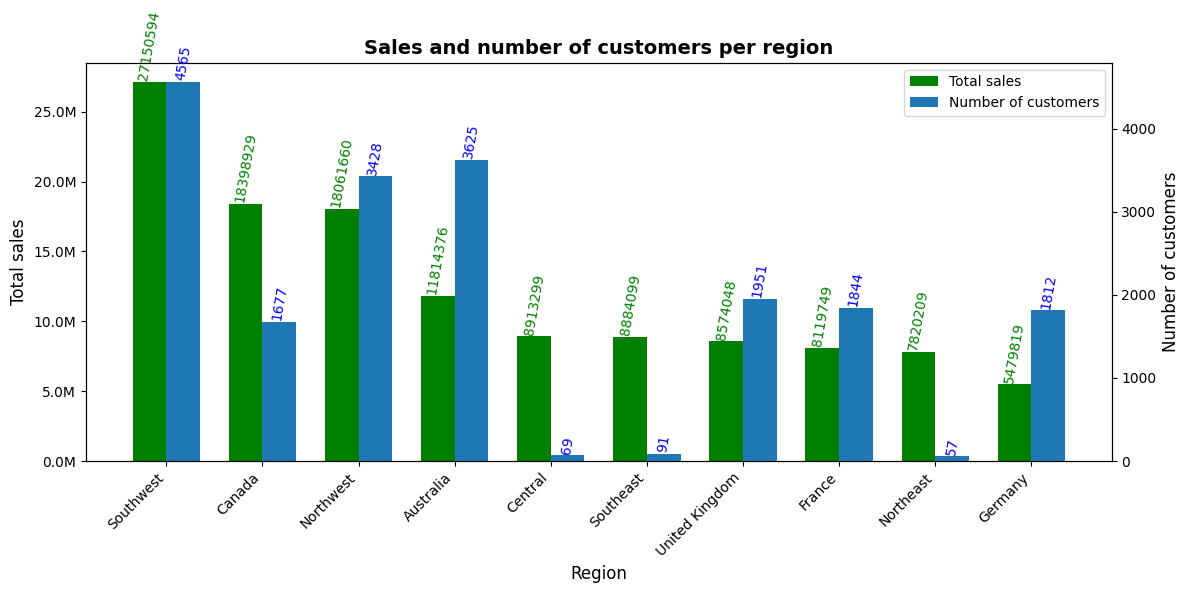

In [8]:
query_viz6 = """
SELECT
    st.Name AS Region, SUM (sordh.TotalDue) AS TotalSale,
    COUNT(DISTINCT sordh.CustomerID) AS CustomerID
FROM Sales.SalesOrderHeader sordh
INNER JOIN Sales.SalesTerritory st
    ON sordh.TerritoryID = st.TerritoryID
GROUP BY st.Name
ORDER BY TotalSale DESC
"""

df_viz6 = query_df(query_viz6)
display(df_viz6)

x = np.arange(len(df_viz6['Region']))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(
    x - width/2,
    df_viz6['TotalSale'],
    width,
    label='Total sales',
    color = 'green'
)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=80,
        color='green'
    )

bars2 = ax2.bar(
    x + width/2,
    df_viz6['CustomerID'],
    width,
    label='Number of customers'
)

for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=80,
        color='blue'
    )

ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Total sales', fontsize=12)
ax2.set_ylabel('Number of customers', fontsize=12)

ax1.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M')
)

ax1.set_xticks(x)
ax1.set_xticklabels(df_viz6['Region'], rotation=45, ha='right')

ax1.set_title('Sales and number of customers per region', fontsize=14, fontweight='bold')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()


### Insights – Sales and number of customers per region

The strongest region is Southwest both in sales and number of customers.  

Germany is the weakest region in total sales, but it has more customers than Northeast, even though Northeast has higher sales than Germany.  

This shows that sales do not depend only on the number of customers.  

Sales depend on both the number of customers and the order value.  


## Visualization 7: Average order value per region and customer type

Which regions have the highest-lowest average order value, and does it differ between individual customers and business customers?

Tables used:

- Sales.SalesTerritory

- Sales.SalesOrderHeader

- Sales.Customer

- Sales.Store



Plan:

- Show Total sales number of orders by region

- Sort data chronologically

- Create grouped bar chart

- Analyze the results

,Region,CustomerType,AvgOrderValue
0,Southwest,Store,27739.0649
1,France,Store,27649.5197
2,Northwest,Store,26172.6823
3,United Kingdom,Store,25671.3118
4,Central,Store,23696.7641
5,Canada,Store,23429.7839
6,Northeast,Store,22845.0036
7,Southeast,Store,18913.8069
8,Germany,Store,16414.4199
9,Australia,Store,14415.7618


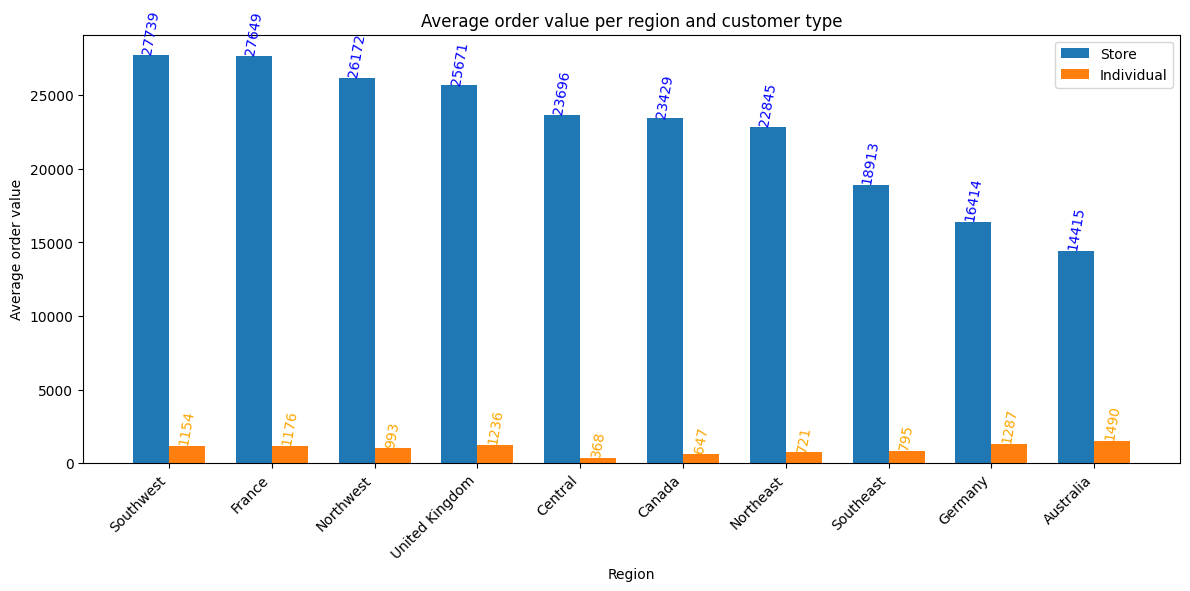

In [9]:
query_viz7 = """

SELECT
    Region, CustomerType,
    SUM (TotalDue) / COUNT (SalesOrderID) AS AvgOrderValue
FROM (
    SELECT
        sst.Name AS Region, sordh.SalesOrderID, sordh.TotalDue,
        CASE
            WHEN sc.StoreID IS NULL THEN 'Individual'
            ELSE 'Store'
        END AS CustomerType
    FROM Sales.SalesOrderHeader sordh
    JOIN Sales.SalesTerritory sst
        ON sordh.TerritoryID = sst.TerritoryID
    JOIN Sales.Customer sc
        ON sordh.CustomerID = sc.CustomerID
) data
GROUP BY Region, CustomerType
ORDER BY AvgOrderValue DESC
"""

df_viz7 = query_df(query_viz7)
display(df_viz7)


pivot_df = df_viz7.pivot(
    index='Region',
    columns='CustomerType',
    values='AvgOrderValue'
).sort_values(by=['Store','Individual'], ascending=False)

x = np.arange(len(pivot_df))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.bar(x - width/2, pivot_df['Store'], width, label='Store')
for bar in bars1:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=80,
        color='blue'
    )


bars2 = ax.bar(x + width/2, pivot_df['Individual'], width, label='Individual')
for bar in bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=80,
        color='orange'
    )

ax.set_xlabel('Region')
ax.set_ylabel('Average order value')
ax.set_title('Average order value per region and customer type')
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


### Insights – Average order value per region and customer type

Store customers have a much higher average order value than Individual customers in all regions.  

The highest order values are for Store customers in the Southwest and France.  

Individual customers spend much less, especially in Central and Canada.   

The highest combination overall is Store customers in the Southwest.   

Some regions like Southwest and France have higher order values than others like Germany and Australia.  

This can be explained by different customer behavior, income levels, prices, or business size in each region.  


## Summary
The analysis shows clear differences in sales, products, regions, and customer types.   

Sales grow over time and are strongly affected by seasonality, product category, and order value.  


***Main findings***

Bikes are the main revenue driver, while Accessories have low sales despite growth potential.   

Southwest is the strongest region, and Store customers have much higher order values than Individual customers.   

High sales depend not only on the number of customers but also on average order value.   


***Recommendations***

The company should focus on high-performing regions (like Southwest and France) and Store customers.   

It can increase revenue by developing Accessories, promoting top products, and using seasonal campaigns during peak months (April–June).   
